In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import math
%matplotlib inline
mammals = pd.read_csv('/var/python/ga/data-science/data/10-mammals.csv', index_col=0)

In [48]:
#1- Summarize the data
print(mammals.describe())

              body        brain
count    62.000000    62.000000
mean    198.789984   283.134194
std     899.158011   930.278942
min       0.005000     0.140000
25%       0.600000     4.250000
50%       3.342500    17.250000
75%      48.202500   166.000000
max    6654.000000  5712.000000


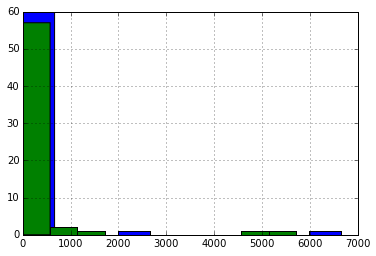

In [49]:
#do some histograms
(mammals['body']).hist()
(mammals['brain']).hist()

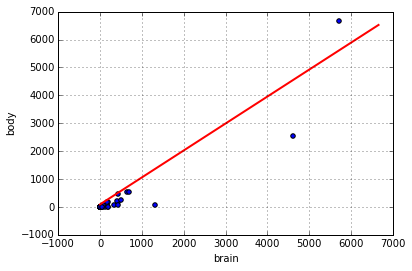

In [110]:
#do some plot thing
mammals.plot(kind='scatter', x='brain', y='body')


# create a fitted model in one line
lm = smf.ols(formula='brain ~ body', data=mammals).fit()
# print the coefficients
lm.params
lm.summary()

X_new = pd.DataFrame({'body': [mammals.body.min(), mammals.body.max()]})
X_new.describe()
X_new.head()

preds = lm.predict(X_new)

plt.plot(X_new, preds, c='red', linewidth=2)

0.920783716903
   log_body
0 -5.298317
1  8.802973
[-1.84788197  8.75186002]


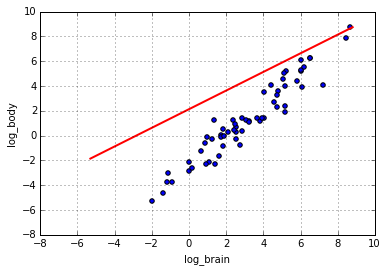

In [117]:
#drop some logs
mammals['log_brain'] = (np.log(mammals['brain']))
mammals['log_body'] = (np.log(mammals['body']))


#do some plot thing
mammals.plot(kind='scatter', x='log_brain', y='log_body')

# create a fitted model in one line
lm = smf.ols(formula='log_brain ~ log_body', data=mammals).fit()
# print the coefficients
lm.params
lm.summary()

X_log = pd.DataFrame({'log_body': [mammals.log_body.min(), mammals.log_body.max()]})

log_preds = lm.predict(X_log)

print(lm.rsquared)
print(X_log)
print(log_preds)

plt.plot(X_log, log_preds, c='red', linewidth=2)